# OCR Application Using CNN on MNIST Dataset


## Step 1: Import Libraries


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess the MNIST Dataset


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Step 3: Build the CNN Model


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Compile and Train the Model


In [4]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.1261 - loss: 2.2995 - val_accuracy: 0.2860 - val_loss: 2.2561
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2175 - loss: 2.2501 - val_accuracy: 0.4848 - val_loss: 2.1906
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3321 - loss: 2.1857 - val_accuracy: 0.5870 - val_loss: 2.1016
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4182 - loss: 2.0981 - val_accuracy: 0.6585 - val_loss: 1.9790
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4894 - loss: 1.9778 - val_accuracy: 0.7082 - val_loss: 1.8153
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5446 - loss: 1.8219 - val_accuracy: 0.7394 - val_loss: 1.6121
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5808 - loss: 1.6444 - val_accuracy: 0.7577 - val_loss: 1.3930
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6062 - loss: 1.4697 - val_accuracy: 

## Step 5: Visualizing Random Predictions from the Test Set


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


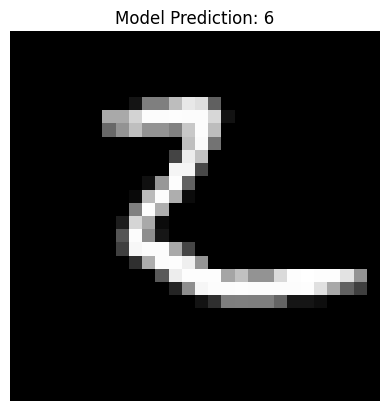

In [5]:

random_idx = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_idx]

predicted_label = model.predict(random_image.reshape(1, 28, 28, 1)).argmax()

plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'Model Prediction: {predicted_label}')
plt.axis('off')
plt.show()